In [233]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [234]:
titanic_data = pd.read_csv("Titanic-Dataset.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [235]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [236]:

titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [237]:
titanic_data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


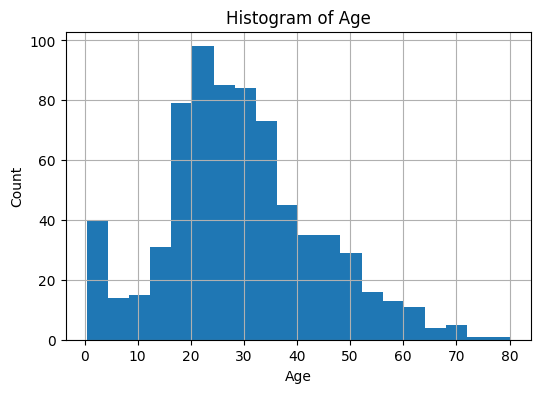

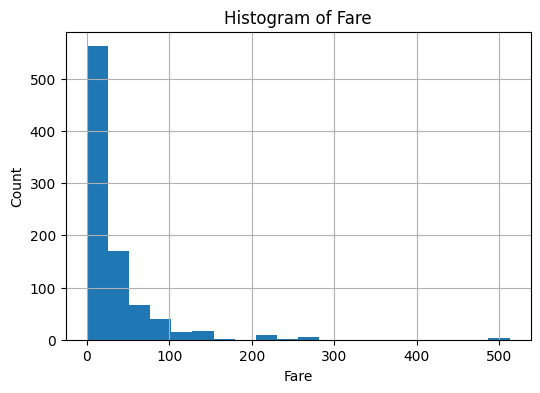

In [238]:
numeric_features = ["Age", "Fare"]
for col in numeric_features:
    titanic_data[col].hist(bins=20, figsize=(6,4))
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Histogram of {col}")
    plt.show()

In [239]:
titanic_data["Sex"].value_counts()

,count
Sex,
male,577
female,314


In [240]:
ticket_class = titanic_data["Pclass"].value_counts()
ticket_class

,count
Pclass,
3,491
1,216
2,184


In [241]:
titanic_data["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [242]:
titanic_data["Survived"].value_counts()

,count
Survived,
0,549
1,342


In [243]:
titanic_data["SibSp"].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [244]:
titanic_data["Parch"].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [245]:
male_data = titanic_data[titanic_data["Sex"] == "male"]
female_data = titanic_data[titanic_data["Sex"] == "female"]

print(male_data["Survived"].value_counts())
print(female_data["Survived"].value_counts())

Survived
0    468
1    109
Name: count, dtype: int64
Survived
1    233
0     81
Name: count, dtype: int64


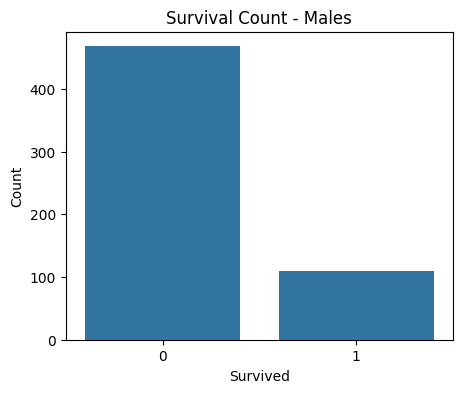

In [246]:
plt.figure(figsize=(5, 4))
sns.countplot(x="Survived", data=male_data)
plt.title("Survival Count - Males")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

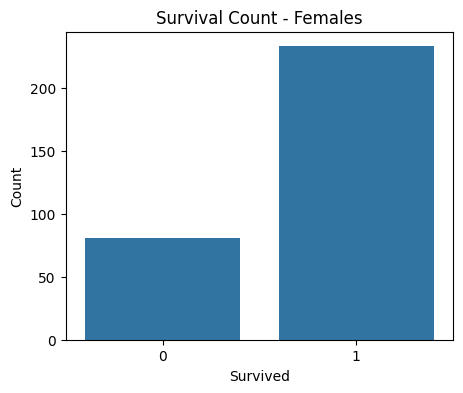

In [247]:
plt.figure(figsize=(5,4))
sns.countplot(x="Survived", data=female_data)
plt.title("Survival Count - Females")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

In [248]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [249]:
from sklearn.ensemble import RandomForestRegressor

missing_age = titanic_data[titanic_data["Age"].isnull()]
known_age = titanic_data[titanic_data["Age"].notnull()]

predict_features = ["Sex", "Pclass", "Parch", "Fare"]

X_train = pd.get_dummies(known_age[predict_features]).astype(int)
y_train = known_age["Age"]
model = RandomForestRegressor()
model.fit(X_train, y_train)

X_missing = pd.get_dummies(missing_age[predict_features]).astype(int)
y_preds = model.predict(X_missing).round(1)

titanic_data.loc[titanic_data['Age'].isnull(), 'Age'] = y_preds

In [250]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [251]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/tmp/ipython-input-4055456537.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


In [252]:
titanic_data.drop('Cabin', axis=1, inplace=True)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [253]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [254]:
name_tag = titanic_data["Name"].str.contains("Mr|Mrs|Miss", case=False, na=False)
name_tag

,Name
0,True
1,True
2,True
3,True
4,True
...,...
886,False
887,True
888,True
889,True


In [255]:
titanic_data["Name_Tag"] = name_tag
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_Tag
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True


In [256]:
categorical_features = ["Sex", "Embarked", "Name_Tag"]

numeric_features = ["Pclass", "Age", "SibSp", "Parch", "Fare"]

In [257]:
categorical_transf = Pipeline(steps = [
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [258]:
from sklearn.preprocessing import StandardScaler

numeric_transf = Pipeline(steps=[
    ("scaler", StandardScaler())
])

In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [260]:
preprocessor = ColumnTransformer(transformers = [
    ("cat", categorical_transf, categorical_features),
    ("num", numeric_transf, numeric_features)
])

In [261]:
X = titanic_data.drop(["PassengerId", "Survived", "Name", "Ticket"], axis=1)
y = titanic_data["Survived"]
print(y)
print(X)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
     Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Name_Tag
0         3    male  22.0      1      0   7.2500        S      True
1         1  female  38.0      1      0  71.2833        C      True
2         3  female  26.0      0      0   7.9250        S      True
3         1  female  35.0      1      0  53.1000        S      True
4         3    male  35.0      0      0   8.0500        S      True
..      ...     ...   ...    ...    ...      ...      ...       ...
886       2    male  27.0      0      0  13.0000        S     False
887       1  female  19.0      0      0  30.0000        S      True
888       3  female   8.7      1      2  23.4500        S      True
889       1    male  26.0      0      0  30.0000        C      True
890       3    male  32.0      0      0   7.7500        Q      True

[891 rows x 8 columns]


In [262]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [263]:
clf_models={
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier()
}

results = {}

In [264]:
for model_name, model in clf_models.items():

  model_pipeline = Pipeline(steps = [
      ("preprocessor", preprocessor),
      ("model", model)
  ])

  print(f"Model Fitting: {model_name}...")
  model_pipeline.fit(X_train, y_train)

  print(f"Model Scoring: {model_name}...")
  results[model_name] = model_pipeline.score(X_test, y_test)

Model Fitting: LogisticRegression...
Model Scoring: LogisticRegression...
Model Fitting: RandomForestClassifier...
Model Scoring: RandomForestClassifier...
Model Fitting: XGBClassifier...
Model Scoring: XGBClassifier...


In [265]:
results

{'LogisticRegression': 0.7932960893854749,
 'RandomForestClassifier': 0.8379888268156425,
 'XGBClassifier': 0.7821229050279329}

In [266]:
results_df = pd.DataFrame(results.items(), columns=["Model", "Accuracy"])
results_df

,Model,Accuracy
0,LogisticRegression,0.793296
1,RandomForestClassifier,0.837989
2,XGBClassifier,0.782123


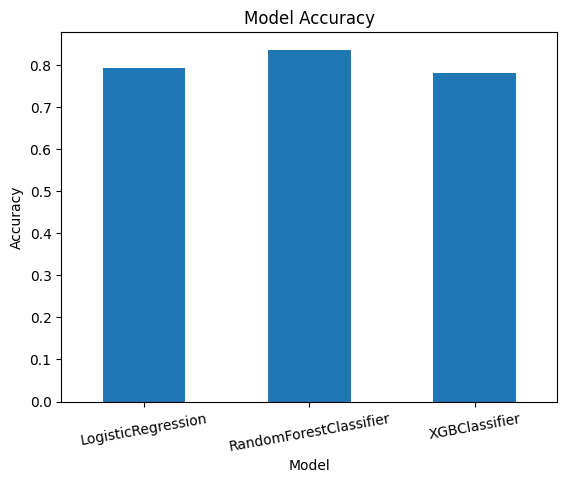

In [267]:
results_df.plot.bar(x="Model", legend=False)
plt.xticks(rotation=10)
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.show()

In [268]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

In [269]:
best_model = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", best_model)
])

rfc_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked',
                                                   'Name_Tag']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare'])])),
                ('model', RandomForestClassifier())])

In [270]:
rfc_pipeline.score(X_test, y_test)

y_pred = rfc_pipeline.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[93, 12],
       [18, 56]])

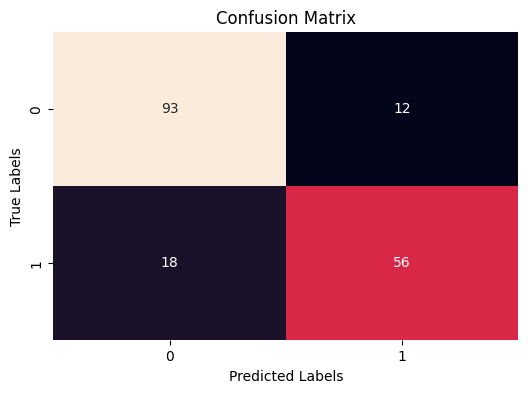

In [271]:
def plot_confusion_matrix(y_test, y_pred):
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,
                cbar=False)

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

In [272]:
print(f"Precision score: {precision_score(y_test, y_pred)}")
print(f"Recall score: {recall_score(y_test, y_pred)}")
print(f"F1 score: {f1_score(y_test, y_pred)}")

Precision score: 0.8235294117647058
Recall score: 0.7567567567567568
F1 score: 0.7887323943661971


In [273]:
print(f"Report: {classification_report(y_test, y_pred)}")

Report:               precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [274]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=rfc_pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex',
                                                                          'Embarked',
                                                                          'Name_Tag']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare'])])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__bootstrap': [True, False],
                         'model__max_depth': [None, 5, 10, 15],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [275]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
print("Test Set Accuracy:", grid_search.score(X_test, y_test))

Best Parameters: {'model__bootstrap': True, 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best Cross-Validation Accuracy: 0.832837584950261
Test Set Accuracy: 0.8212290502793296


In [276]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1:", f1_score(y_test, y_pred_best))

Precision: 0.8088235294117647
Recall: 0.7432432432432432
F1: 0.7746478873239436


In [277]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred_best)
mae = mean_absolute_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.1787709497206704
Mean Absolute Error: 0.1787709497206704
R-squared: 0.26280566280566275
